# SINIFLANDIRMA PROBLEMLERI

* [Logistic Regression](#lr)
    * [Model](#lr_model)
    * [Tuning](#lr_tuning)
* [Naive Bayes](#nb)
    * [Model & Tahmin](#nb_model)
* [K-En Yakın Komşu (KNN)](#knn)
    * [Model & Tahmin](#knn_model)
    * [Model Tuning](#knn_model_tuning)
* [Destek Vektör Sınıflandırıcısı (SVC)](#svc)
    * [Model & Tahmin](#svc_model)
    * [Model Tuning](#svc_model_tuning)
* [Doğrusal Olmayan SVC](#non_svc)
    * [Model & Tahmin](#non_svc_model)
    * [Model Tuning](#non_svc_model_tuning)
* [Yapay Sinir Ağları (Artificial Neurol Network)](#ysa)
    * [Model & Tahmin](#ysa_model)
    * [Model Tuning](#ysa_model_tuning)
* [Sınıflandırma Ağaçları (CART)](#cart)
    * [Model & Tahmin](#cart_model)
    * [Model Tuning](#cart_model_tuning)
* [Random Forests(RF)](#rf)
    * [Model & Tahmin](#rf_model)
    * [Model Tuning](#rf_model_tuning)
* [Gradient Boosting Machines (GBM)](#gbm)
    * [Model & Tahmin](#gbm_model)
    * [Model Tuning](#gbm_model_tuning)
* [XGBoost](#xgb)
    * [Model & Tahmin](#xgb_model)
    * [Model Tuning](#xgb_model_tuning)
* [LightGBM](#lgbm)
    * [Model & Tahmin](#lgbm_model)
    * [Model Tuning](#lgbm_model_tuning)
* [CatBoost](#cb)
    * [Model & Tahmin](#cb_model)
    * [Model Tuning](#cb_model_tuning)
* [TÜM MODELLERİN KARŞILAŞTIRMASI](#SON)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Lojistik Regresyon <a id="lr"/>

Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

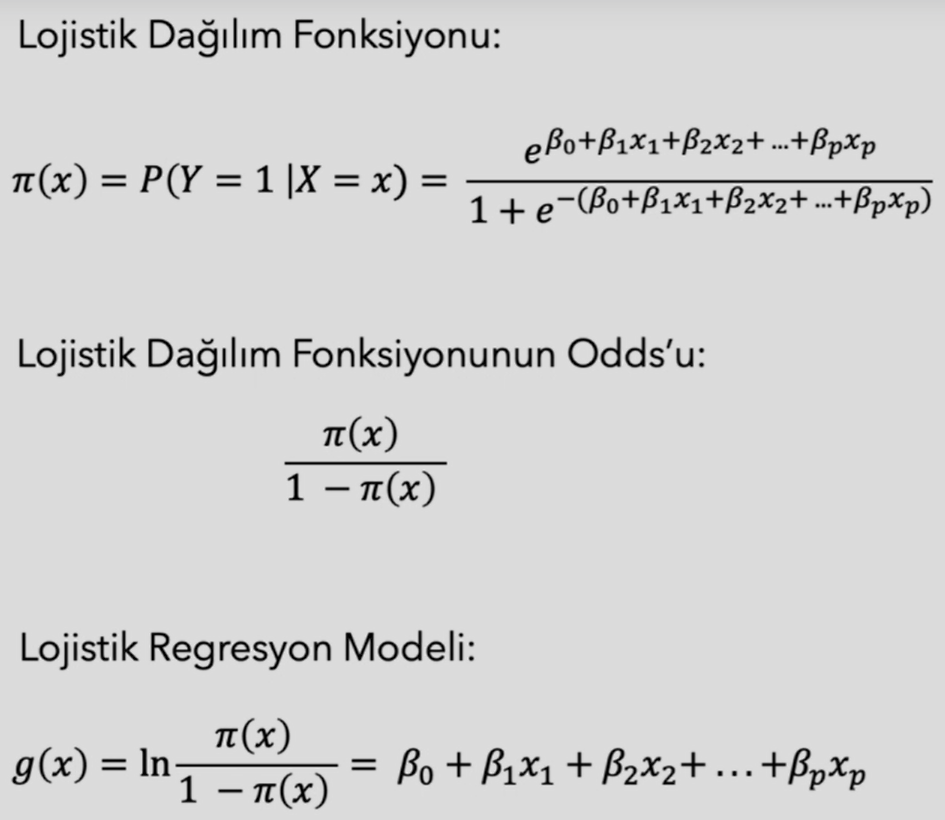

* Bağımlı değişken kategoriktir
* Adını bağımlı değişkene uygulanan logit dönüşümden alır.
* Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez.
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

## Model <a id="lr_model"/>

In [2]:
diabets = pd.read_csv("diabetes.csv")
df = diabets.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

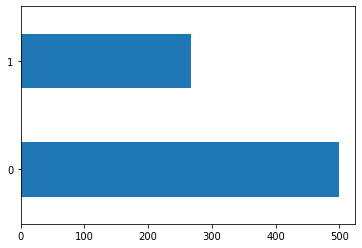

In [7]:
df["Outcome"].value_counts().plot.barh()

In [8]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [9]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                 0.05922
Time:                        17:39:06   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [10]:
# Sci-kit Learn

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver='liblinear')
loj_model = loj.fit(X, y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
loj_model.intercept_

array([-5.89159518])

In [13]:
loj_model.coef_ # Katsayılar

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

## Tahmin & Model Tuning <a id = "lr_tuning"/>

In [14]:
y_pred = loj_model.predict(X)

In [15]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
loj_model.predict(X)[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [20]:
loj_model.predict_proba(X)[:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [37]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:, 1]

In [38]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [39]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7447916666666666

In [43]:
cross_val_score(loj_model, X_test, y_test, cv=10)

array([0.7       , 0.75      , 0.85      , 0.78947368, 0.84210526,
       0.68421053, 0.89473684, 0.63157895, 0.63157895, 0.5       ])

In [44]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7273684210526316

# Naive Bayes <a id="nb"/>

Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.
E-ticarette bayes iyi çalışır.

## Model & Tahmin <a id="nb_model"/>

In [45]:
df = diabets.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
nb_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [49]:
nb_model.predict_proba(X_test)[:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [50]:
y_pred = nb_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [52]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

# K-En Yakın Komşu (KNN) <a id="knn" />

Tahminler gözlem benzerliğine göre yapılır.

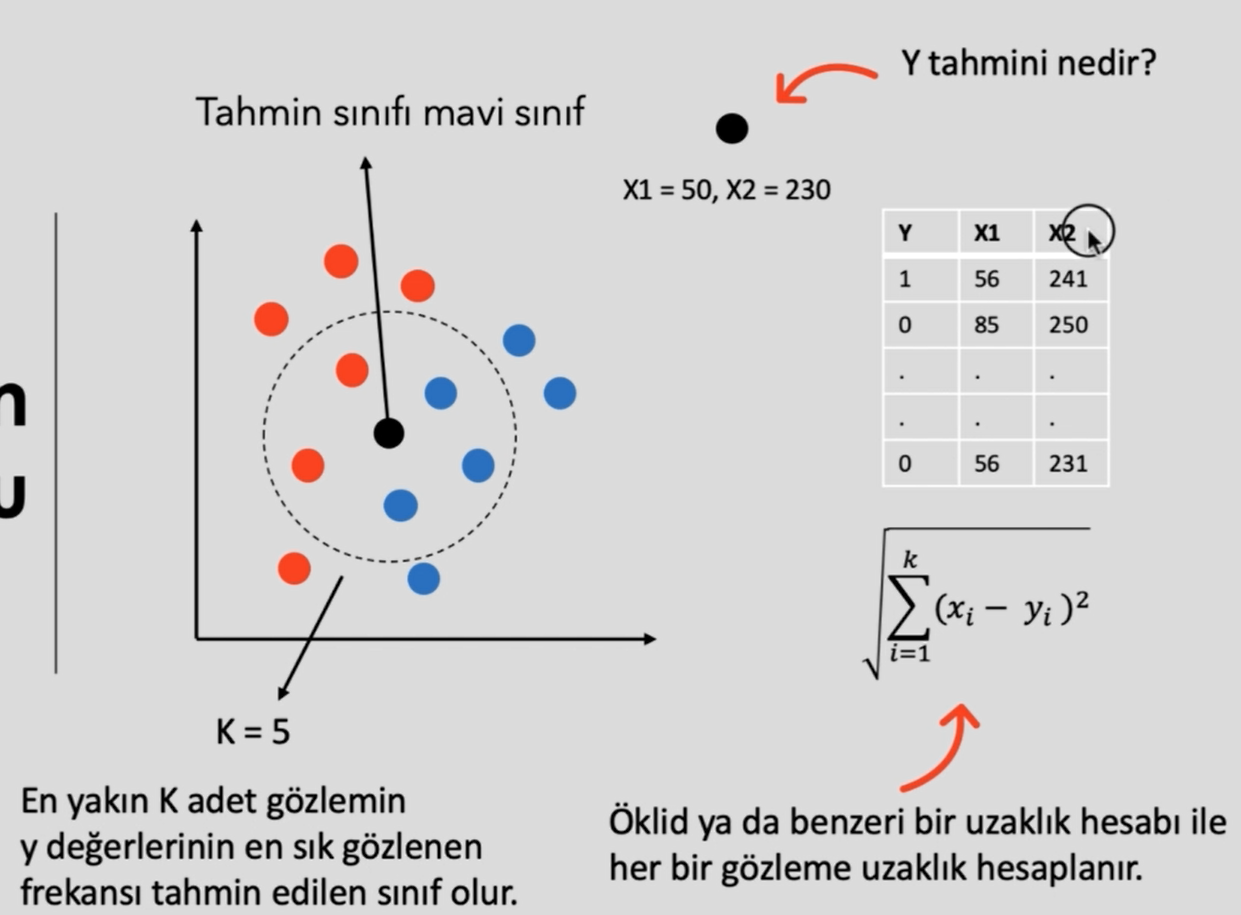

#### KNN Basamakları
* Komşu sayısını belirle(k)
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemini seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.

## Model & Tahmin <a id="knn_model" />